In [212]:
# Pearson correlation coefficient
# import glob
import os
# import datetime as dt
import numpy as np
import pandas as pd
# from pathlib import Path
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from treeinterpreter import treeinterpreter as ti
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
# from sklearn.metrics import accuracy_score, precision_recall_curve, precision_score

# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedKFold

In [213]:
# Read data from csv files
df_read = pd.read_csv(f'{os.getcwd()}/market_prediction/hour_df.csv')
df_read.rename(columns={'close':'Price'}, inplace=True)

In [214]:
print(len(df_read))
df_read.set_index('date', inplace=True)
print(df_read.head())

104
                  positive  negative   neutral       score     Price
date                                                                
2022-02-27 11:00  0.136658  0.020665  0.842666  534.449361  39506.94
2022-02-27 12:00  0.140839  0.022763  0.836392  695.736467  39772.65
2022-02-27 13:00  0.154944  0.027658  0.817392  456.427667  39087.32
2022-02-27 14:00  0.137984  0.033730  0.828276  547.796955  38805.72
2022-02-27 15:00  0.137928  0.049283  0.812779  525.495285  39375.33


In [307]:
# Predicting stock prices using Random Forest Regression model
def RandomForestModel(df):
    # Split data into training and testing sets
    train_start_index = 0
    train_end_index = int(len(df) * 0.6)
    test_start_index = train_end_index + 1
    test_end_index = len(df)

    train = df.iloc[train_start_index:train_end_index]
    test = df.iloc[test_start_index:test_end_index]

    # train, test = train_test_split(df, shuffle=False, test_size=0.2)
    # print(train.size)
    # print(test.size)

    sentiment_score_list_train = []
    for date, row in train.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'negative'], df.loc[date, 'neutral'],  df.loc[date, 'positive']])
        sentiment_score_list_train.append(sentiment_score)
    numpy_df_train = np.asarray(sentiment_score_list_train)

    sentiment_score_list_test = []
    for date, row in test.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'negative'], df.loc[date, 'neutral'],  df.loc[date, 'positive']])
        sentiment_score_list_test.append(sentiment_score)
    numpy_df_test = np.asarray(sentiment_score_list_test)

    y_train = pd.DataFrame(train['Price'])
    y_test = pd.DataFrame(test['Price'])

    rf = RandomForestRegressor(n_estimators=100, random_state=0)
    rf.fit(numpy_df_train, y_train)
    prediction, bias, contributions = ti.predict(rf, numpy_df_test)

    # View accuracy of model on test data
    print('Mean Absolute Error:', round(mean_absolute_error(y_test, prediction), 2))
    print('Mean Squared Error:', round(mean_squared_error(y_test, prediction), 2))
    print('RMSE (Root Mean Squared Error):', sqrt(mean_squared_error(y_test, prediction)))
    

    # Save the index for prediction_df as the index in the dataframe
    prediction_df = pd.DataFrame(prediction, index=test.index)

    # Plot the prediction and actual values in the same graph 
    ax = prediction_df.rename(columns={0: 'Predicted Price'}).plot(figsize=(15, 5), title='Random Forest Predicted Price', style='orange')
    ax.set_xlabel('Date and Time')
    ax.set_ylabel('Stock Price Predicted')
    fig = y_test.rename(columns={'Price': 'Actual Price'}).plot(ax=ax, figsize=(15, 5), secondary_y=True, style='b-')
    fig.set_xlabel('Date and Time')
    fig.set_ylabel('Stock Price')
    plt.gcf().autofmt_xdate()
    plt.show()

    
    return prediction #, bias, contributions


310
205
Mean Absolute Error: 2158.67

C:\Users\paulc\AppData\Local\Temp/ipykernel_11144/3039763621.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(numpy_df_train, y_train)



Mean Squared Error: 6344476.92
RMSE (Root Mean Squared Error): 2518.824511125103


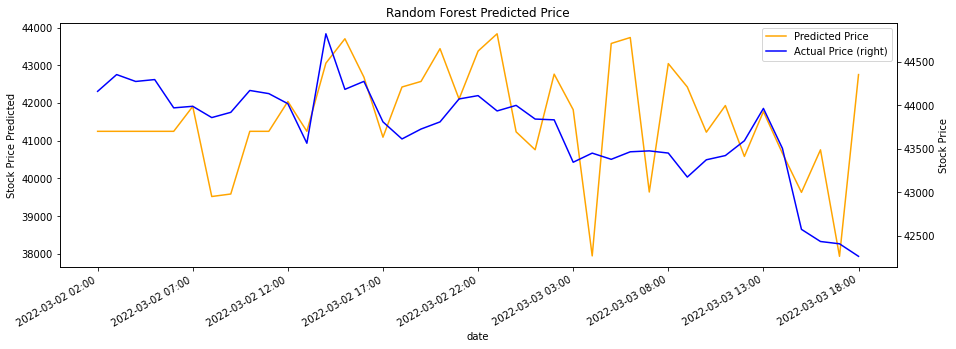

In [308]:
prediction = RandomForestModel(df_read)

In [132]:
# Evaluate the model using 10-fold cross validation by calling the function above and passing the training data  and test data
# def cross_validation(df):
#     # Split train and test data into 10 folds
#     kf = RepeatedKFold(n_splits=10, n_repeats=3, random_state=None)

#     for train_index, test_index in kf.split(df):
#         train_data = df.iloc[train_index]
#         test_data = df.iloc[test_index]

#         # Print the percentage of test data in each fold
#         print("\n\n")
#         print(f"Percentage of test data in each fold:{test_data.shape[0] / df.shape[0] * 100} %")
        
#         # Predict stock prices using Random Forest Regression model
#         prediction = RandomForestModel(train_data, test_data, df)

# cross_validation(df_read)




Percentage of positive sentiment: 16.532415132993926
Percentage of negative sentiment: 2.807411455640808
Percentage of neutral sentiment: 80.66017341136526


[]

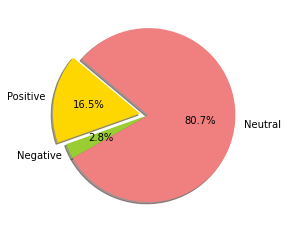

In [310]:
# Create a pie chart to show the percentage of positive and negative sentiment
positive_sentiment = df_read['positive'].sum()
negative_sentiment = df_read['negative'].sum()
neutral_sentiment = df_read['neutral'].sum()

# Percentage of positive sentiment
positive_sentiment_percentage = positive_sentiment / (positive_sentiment + negative_sentiment + neutral_sentiment) * 100
negative_sentiment_percentage = negative_sentiment / (positive_sentiment + negative_sentiment + neutral_sentiment) * 100
neutral_sentiment_percentage = neutral_sentiment / (positive_sentiment + negative_sentiment + neutral_sentiment) * 100

# Print the percentage of positive and negative sentiment
print("\n\n")
print("Percentage of positive sentiment:", positive_sentiment_percentage)
print("Percentage of negative sentiment:", negative_sentiment_percentage)
print("Percentage of neutral sentiment:", neutral_sentiment_percentage)

# Plot the pie chart 
labels = 'Positive', 'Negative', 'Neutral'
sizes = [positive_sentiment_percentage, negative_sentiment_percentage, neutral_sentiment_percentage]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.plot()